In [ ]:
# ## Harry Potter Data

# https://www.kaggle.com/datasets/gulsahdemiryurek/harry-potter-dataset

# ## Harry Potter API

# https://docs.potterdb.com/

# Possible hypothesis ideas?
- Gryffindor is the house that has more members of the Dumbledore army. (Accepted)
- Slytherin is the house with the most pure-bloods.
- Gryffindor is the house that's said 'Voldemort' the most.
- England is the country with the most evil wizards.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import requests

In [ ]:
url_characters = "https://www.dropbox.com/scl/fi/xzmr3oux845e6dyqdvj0i/Characters.csv?rlkey=mzj5dbrin6w2sjs7dbqq5bg2y&st=o5olwm7n&dl=1"
characters = pd.read_csv(url_characters, delimiter=';', on_bad_lines='skip')
print(characters.columns)
characters.head()

Index(['Id', 'Name', 'Gender', 'Job', 'House', 'Wand', 'Patronus', 'Species',
       'Blood status', 'Hair colour', 'Eye colour', 'Loyalty', 'Skills',
       'Birth', 'Death'],
      dtype='object')


,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN


In [ ]:
url_hp_1 = "https://www.dropbox.com/scl/fi/wuhb6ldtde5z32pn9516r/Harry-Potter-1.csv?rlkey=i0jwx5x6hdor433kwdxrpome7&st=z31urnnk&dl=1"
HarryPotter_1 = pd.read_csv(url_hp_1, delimiter=';', on_bad_lines='skip')
print(HarryPotter_1.columns)
HarryPotter_1.head()

Index(['Character', 'Sentence'], dtype='object')


,Character,Sentence
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.


In [ ]:
url_hp_2 = "https://www.dropbox.com/scl/fi/w9juh051m35wgb9ohhjvn/Harry-Potter-2.csv?rlkey=4tq32418u5rod8d8aqwx3xaf5&st=ec57t424&dl=1"
HarryPotter_2 = pd.read_csv(url_hp_2, delimiter=';', on_bad_lines='skip')
print(HarryPotter_2.columns)
HarryPotter_2.head()

Index(['Character', 'Sentence'], dtype='object')


,Character,Sentence
0,HARRY,"I can’t let you out, Hedwig."
1,HARRY,I’m not allowed to use magic outside of school.
2,HARRY,"Besides, if Uncle Vernon…"
3,VERNON,Harry Potter!
4,HARRY,Now you’ve done it.


In [ ]:
url_hp_3 = "https://www.dropbox.com/scl/fi/km1rcr18vtf215m71kuj0/Harry-Potter-3.csv?rlkey=149x838b5ychrhe4e8tbfrb97&st=ov2y3xq1&dl=1"
HarryPotter_3 = pd.read_csv(url_hp_3, delimiter=';', on_bad_lines='skip')
print(HarryPotter_3.columns)
HarryPotter_3.head()

Index(['CHARACTER', 'SENTENCE'], dtype='object')


,CHARACTER,SENTENCE
0,HARRY,Lumos Maxima...
1,HARRY,Lumos Maxima...
2,HARRY,Lumos Maxima...
3,HARRY,Lumos... MAXIMA!
4,AUNT PETUNIA,Harry! Harry!


In [ ]:
potions_url = "https://www.dropbox.com/scl/fi/rkxhpjhkueof5hjn25axs/Potions.csv?rlkey=o04j1pq64cjazkdtc3mla4v7l&st=2b2i0a8b&dl=1"
Potions = pd.read_csv(potions_url, delimiter=';', on_bad_lines='skip')
print(Potions.columns)
Potions.head()

Index(['Name', 'Known ingredients', 'Effect', 'Characteristics',
       'Difficulty level'],
      dtype='object')


,Name,Known ingredients,Effect,Characteristics,Difficulty level
0,Ageing Potion,"Newt spleens , Bananas",Ages drinker temporarily,Green,Advanced
1,Amortentia,NaN,Love Potion that causes a powerful infatuation...,"Mother-of-pearl sheen, Spiralling steam, Scent...",Advanced
2,Antidote to Veritaserum,NaN,Counters the effect of Veritaserum,NaN,NaN
3,Babbling Beverage,"Valerian sprigs, Aconite, Dittany",Causes the drinker to speak nonsense,NaN,NaN
4,Baruffio's Brain Elixir,"Leaping Toadstools, Frog Brains, Runespoor egg...",Allegedly increases one's brain power,Green in colour,NaN


In [ ]:
SPELLS_URL = "https://www.dropbox.com/scl/fi/wthwgsvdy4mxi0dlxg3p4/Spells.csv?rlkey=fpt5r4g3ac0rerprjaeixot4m&st=6blq9gk0&dl=1"
Spells = pd.read_csv(SPELLS_URL, delimiter=';', on_bad_lines='skip')
print(Spells.columns)
Spells.head()

Index(['Name', 'Incantation', 'Type', 'Effect', 'Light'], dtype='object')


,Name,Incantation,Type,Effect,Light
0,Summoning Charm,Accio,Charm,Summons an object,NaN
1,Age Line,Unknown,Charm,Prevents people above or below a certain age f...,Blue
2,Water-Making Spell,Aguamenti,"Charm, Conjuration",Conjures water,Icy blue
3,Launch an object up into the air,Alarte Ascendare,Charm,Rockets target upward,Red
4,Albus Dumbledore's Forceful Spell,Unknown,Spell,Great Force,NaN


In [ ]:
shortCharacters_URL = "https://www.dropbox.com/scl/fi/t3zeed43nvxj6557tito0/shortversioncharacters.csv?rlkey=8l33ot1eyzcec9xqpsswkdjb6&st=6mfvlaki&dl=1"
short_characters = pd.read_csv(shortCharacters_URL, delimiter=',', on_bad_lines='skip')
print(short_characters.columns)
short_characters.head()

Index(['name', 'species', 'gender', 'house', 'dateOfBirth', 'yearOfBirth',
       'ancestry', 'eyeColour', 'hairColour', 'wand', 'patronus',
       'hogwartsStudent', 'hogwartsStaff', 'actor', 'alive', 'image'],
      dtype='object')


,name,species,gender,house,dateOfBirth,yearOfBirth,ancestry,eyeColour,hairColour,wand,patronus,hogwartsStudent,hogwartsStaff,actor,alive,image
0,Harry Potter,human,male,Gryffindor,31-07-1980,1980.0,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,True,http://hp-api.herokuapp.com/images/harry.jpg
1,Hermione Granger,human,female,Gryffindor,19-09-1979,1979.0,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,True,http://hp-api.herokuapp.com/images/hermione.jpeg
2,Ron Weasley,human,male,Gryffindor,01-03-1980,1980.0,pure-blood,blue,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,True,http://hp-api.herokuapp.com/images/ron.jpg
3,Draco Malfoy,human,male,Slytherin,05-06-1980,1980.0,pure-blood,grey,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",NaN,True,False,Tom Felton,True,http://hp-api.herokuapp.com/images/draco.jpg
4,Minerva McGonagall,human,female,Gryffindor,04-10-1925,1925.0,NaN,NaN,black,"{'wood': '', 'core': '', 'length': ''}",tabby cat,False,True,Dame Maggie Smith,True,http://hp-api.herokuapp.com/images/mcgonagall.jpg


In [ ]:
url = "https://api.potterdb.com/v1/characters?page[number]=2"
response = requests.get(url)
read_json = response.json()
pd.json_normalize(read_json['data'])
# Loop that change page number continually

,id,type,attributes.slug,attributes.alias_names,attributes.animagus,attributes.blood_status,attributes.boggart,attributes.born,attributes.died,attributes.eye_color,...,attributes.nationality,attributes.patronus,attributes.romances,attributes.skin_color,attributes.species,attributes.titles,attributes.wands,attributes.weight,attributes.wiki,links.self
0,08bfb13a-54df-43a4-bb00-b7a3300b70e5,character,alderton,[],None,Muggle-born (as determined by the Muggle-Born ...,None,None,None,None,...,British,None,[],Pale,Human,[],[],None,https://harrypotter.fandom.com/wiki/Alderton,/v1/characters/08bfb13a-54df-43a4-bb00-b7a3300...
1,151d2acb-e697-482f-8151-a5d12535ba57,character,arkie-alderton-s-alleged-son,[],None,Muggle-born or half-blood,None,None,None,None,...,None,None,[],None,Human,[],[],None,https://harrypotter.fandom.com/wiki/Arkie_Alde...,/v1/characters/151d2acb-e697-482f-8151-a5d1253...
2,fdfb7529-9db0-40b5-926b-0f371be8596b,character,alecto-carrow,[],None,Pure-blood or half-blood,None,"Before 1981, Great Britain",None,None,...,British or Irish,None,[],None,Human,[Professor],"[Unknown length, wood and core materials]",None,https://harrypotter.fandom.com/wiki/Alecto_Carrow,/v1/characters/fdfb7529-9db0-40b5-926b-0f371be...
3,a3373081-b4be-48ed-a67e-412741ceb14f,character,alec-webb,[],None,Muggle,None,None,None,None,...,None,None,[],None,Human,[],[],None,https://harrypotter.fandom.com/wiki/Alec_Webb,/v1/characters/a3373081-b4be-48ed-a67e-412741c...
4,9f72fb55-27cc-45b5-87fe-a40b2eb58c74,character,alejandra-alonso,[],None,None,None,After 1976,None,None,...,Brazilian,None,[],None,Human,[Chaser],[],None,https://harrypotter.fandom.com/wiki/Alejandra_...,/v1/characters/9f72fb55-27cc-45b5-87fe-a40b2eb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3f57bcbc-982f-4fe0-b761-7bd7ce0c00a8,character,angelo-benitez,[],None,No-Maj,None,None,None,None,...,None,None,[],None,Human,[],[],None,https://harrypotter.fandom.com/wiki/Angelo_Ben...,/v1/characters/3f57bcbc-982f-4fe0-b761-7bd7ce0...
96,6b11a95d-bc29-4bb7-b084-21290d1f1f28,character,angelus-moriattis,[],None,None,None,c. 1931 or earlier,None,None,...,British or Irish,None,[],None,Human,[],[],None,https://harrypotter.fandom.com/wiki/Angelus_Mo...,/v1/characters/6b11a95d-bc29-4bb7-b084-21290d1...
97,c2d4d311-8a98-4a53-abc6-93f6d848cdaf,character,angelus-peel,[],None,None,None,"Before 1860, Canada",None,None,...,Canadian,None,[],None,Human,[Seeker],[],None,https://harrypotter.fandom.com/wiki/Angelus_Peel,/v1/characters/c2d4d311-8a98-4a53-abc6-93f6d84...
98,6a5bbe46-ac98-48dc-9a2a-d22e75d7c069,character,angry-wizard,[],None,None,None,None,None,Black,...,None,None,[],Light,Human,[],[],None,https://harrypotter.fandom.com/wiki/Angry_wizard,/v1/characters/6a5bbe46-ac98-48dc-9a2a-d22e75d...


In [ ]:
print(characters.columns)
characters.head()
# Albus Dumbledore / Dumbledore's Army / Order of the Phoenix /Original Order of the Phoenix - good
# Lord Voldemort  / Death Eaters - bad / British Ministry of Magic -
# Neutral:  Gringotts Wizarding Bank / Hogwarts School of Witchcraft and Wizardry
# # Get unique values from the 'Loyalty' column
# unique_values = characters['Loyalty'].unique()

# # Display the unique values
# print(unique_values)

Index(['Id', 'Name', 'Gender', 'Job', 'House', 'Wand', 'Patronus', 'Species',
       'Blood status', 'Hair colour', 'Eye colour', 'Loyalty', 'Skills',
       'Birth', 'Death'],
      dtype='object')


,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",NaN,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN


In [ ]:
# Albus Dumbledore / Dumbledore's Army / Order of the Phoenix /Original Order of the Phoenix - good
# Lord Voldemort  / Death Eaters - bad / British Ministry of Magic -
good_loyalty_values = [
    'Albus Dumbledore',
    'Dumbledore\'s Army',
    'Order of the Phoenix',
    'Original Order of the Phoenix'
]

bad_loyalty_values = [
    'Lord Voldemort',
    'Death Eaters',
    'British Ministry of Magic',
    'Ministry of Magic'
]
# Function to check if loyalty is good or bad
def categorize_loyalty(loyalty_str):
    if pd.isna(loyalty_str):
        return 'Unknown'
    if any(loyalty in loyalty_str for loyalty in good_loyalty_values):
        return 'Good'
    if any(loyalty in loyalty_str for loyalty in bad_loyalty_values):
        return 'Bad'
    return 'Neutral'

# Apply the function to create the new column
characters['Good/Bad'] = characters['Loyalty'].apply(categorize_loyalty)

# Select the specified columns
good_bad = characters[['Id', 'Name','Gender', 'House','Species','Blood status', 'Loyalty', 'Death', 'Good/Bad']]


# Display the filtered DataFrame
good_bad

,Id,Name,Gender,House,Species,Blood status,Loyalty,Death,Good/Bad
0,1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Albus Dumbledore | Dumbledore's Army | Order o...,NaN,Good
1,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good
2,3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle-born,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Dumbledore's Army | Order of the Phoenix | Hog...,"30 June, 1997",Good
4,5,Rubeus Hagrid,Male,Gryffindor,Half-Human/Half-Giant,Part-Human (Half-giant),Albus Dumbledore | Order of the Phoenix | Hogw...,NaN,Good
...,...,...,...,...,...,...,...,...,...
135,136,Wilhelmina Grubbly-Plank,Female,NaN,Human,NaN,Hogwarts School of Witchcraft and Wizardry,NaN,Neutral
136,137,Fenrir Greyback,Male,NaN,Werewolf,NaN,Lord Voldemort | Death Eaters,NaN,Bad
137,138,Gellert Grindelwald,Male,NaN,Human,Pure-blood or half-blood,Gellert Grindelwald's Acolytes,"March, 1998",Neutral
138,139,Dobby,Male,NaN,House elf,NaN,NaN,"Late March, 1998",Unknown


In [ ]:
good_bad[good_bad['Blood status'].isna()]
good_bad['Blood status'] = good_bad['Blood status'].fillna('Unknown')
good_bad

<ipython-input-13-40a35e05472a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_bad['Blood status'] = good_bad['Blood status'].fillna('Unknown')


,Id,Name,Gender,House,Species,Blood status,Loyalty,Death,Good/Bad
0,1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Albus Dumbledore | Dumbledore's Army | Order o...,NaN,Good
1,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good
2,3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle-born,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Dumbledore's Army | Order of the Phoenix | Hog...,"30 June, 1997",Good
4,5,Rubeus Hagrid,Male,Gryffindor,Half-Human/Half-Giant,Part-Human (Half-giant),Albus Dumbledore | Order of the Phoenix | Hogw...,NaN,Good
...,...,...,...,...,...,...,...,...,...
135,136,Wilhelmina Grubbly-Plank,Female,NaN,Human,Unknown,Hogwarts School of Witchcraft and Wizardry,NaN,Neutral
136,137,Fenrir Greyback,Male,NaN,Werewolf,Unknown,Lord Voldemort | Death Eaters,NaN,Bad
137,138,Gellert Grindelwald,Male,NaN,Human,Pure-blood or half-blood,Gellert Grindelwald's Acolytes,"March, 1998",Neutral
138,139,Dobby,Male,NaN,House elf,Unknown,NaN,"Late March, 1998",Unknown


In [ ]:
good_bad['House'] = good_bad['House'].fillna('None')
# Save the good_bad DataFrame to a CSV file
good_bad.to_csv('good_bad.csv', index=False)

<ipython-input-14-965d32b49ceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_bad['House'] = good_bad['House'].fillna('None')


In [ ]:
# Initialize an empty list to store data
all_data = []

# Loop through pages until no more data is available
page_number = 1
while True:
    url = f"https://api.potterdb.com/v1/characters?page[number]={page_number}"
    response = requests.get(url)
    data = response.json()

    # Check if there is data on the current page
    if not data['data']:
        break

    # Normalize and append the data
    all_data.extend(pd.json_normalize(data['data']).to_dict(orient='records'))

    # Increment the page number
    page_number += 1

# Convert the list of data to a DataFrame
char_api = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
char_api.to_csv('char_api.csv', index=False)

print("Data saved to char_api.csv")

Data saved to char_api.csv


In [ ]:
print(good_bad.columns)
good_bad.head(2)

Index(['Id', 'Name', 'Gender', 'House', 'Species', 'Blood status', 'Loyalty',
       'Death', 'Good/Bad'],
      dtype='object')


,Id,Name,Gender,House,Species,Blood status,Loyalty,Death,Good/Bad
0,1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Albus Dumbledore | Dumbledore's Army | Order o...,NaN,Good
1,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good


In [ ]:
print(char_api.columns)
char_api.head(2)

Index(['id', 'type', 'attributes.slug', 'attributes.alias_names',
       'attributes.animagus', 'attributes.blood_status', 'attributes.boggart',
       'attributes.born', 'attributes.died', 'attributes.eye_color',
       'attributes.family_members', 'attributes.gender',
       'attributes.hair_color', 'attributes.height', 'attributes.house',
       'attributes.image', 'attributes.jobs', 'attributes.marital_status',
       'attributes.name', 'attributes.nationality', 'attributes.patronus',
       'attributes.romances', 'attributes.skin_color', 'attributes.species',
       'attributes.titles', 'attributes.wands', 'attributes.weight',
       'attributes.wiki', 'links.self'],
      dtype='object')


,id,type,attributes.slug,attributes.alias_names,attributes.animagus,attributes.blood_status,attributes.boggart,attributes.born,attributes.died,attributes.eye_color,...,attributes.nationality,attributes.patronus,attributes.romances,attributes.skin_color,attributes.species,attributes.titles,attributes.wands,attributes.weight,attributes.wiki,links.self
0,20448207-20d2-48cb-85b4-d61ee8f50f97,character,1992-gryffindor-vs-slytherin-quidditch-match-s...,[],None,None,None,None,None,None,...,None,None,[],None,None,[],[],None,https://harrypotter.fandom.com/wiki/1992_Gryff...,/v1/characters/20448207-20d2-48cb-85b4-d61ee8f...
1,ba22f019-15ad-480c-a5ea-010382cadf55,character,1996-gryffindor-quidditch-keeper-trials-specta...,[],None,None,None,None,None,None,...,None,None,[],None,None,[],[],None,https://harrypotter.fandom.com/wiki/1996_Gryff...,/v1/characters/ba22f019-15ad-480c-a5ea-010382c...


In [ ]:
# Find the entry for "harry-james-potter" in the attributes.slug column
harry_potter_row = char_api[char_api['attributes.slug'].str.contains('edward-lupin', na=False)]

# Print the result
harry_potter_row

,id,type,attributes.slug,attributes.alias_names,attributes.animagus,attributes.blood_status,attributes.boggart,attributes.born,attributes.died,attributes.eye_color,...,attributes.nationality,attributes.patronus,attributes.romances,attributes.skin_color,attributes.species,attributes.titles,attributes.wands,attributes.weight,attributes.wiki,links.self
1102,a172b5b2-435c-4400-b2d0-2a7d03fdd63b,character,edward-lupin,"[Teddy (by family and friends), Ted]",None,Half-blood,None,"April 1998, England, Great Britain",None,Variable,...,British or Irish,None,[Victoire Weasley (girlfriend)],Variable,Human,[Head Boy],[],None,https://harrypotter.fandom.com/wiki/Edward_Lupin,/v1/characters/a172b5b2-435c-4400-b2d0-2a7d03f...


In [ ]:

# name_sub(slug_name -> attributes.slug): harry-james-potter -> harry-potter
# ronald-bilius-weasley-> ronald-weasley
# hermione-jean-granger -> hermione-granger
# albus-percival-wulfric-brian-dumbledore-> albus-dumbledore
# ginevra-(ginny)-molly-weasley	NaN -> molly-weasley
# lily-j.-potter	-> lily-j-potter
# james-potter -> james-potter-i
# remus-john-lupin -> remus-lupin
# percy-ignatius-weasley -> percy-weasley
# (bill)-william-arthur-weasley	-> arthur-weasley
# lee-jordan	-> lee-jordan
# sybill-patricia-trelawney	-> sybill-trelawney
# myrtle-elizabeth-warren-(moaning-myrtle) -> myrtle-warren
# dolores-jane-umbridge	-> dolores-umbridge
# horace-eugene-flaccus-slughorn -> horace-slughorn
# regulus-arcturus-black	-> regulus-black
# tom-marvolo-riddle	-> tom-riddle
# barty-crouch-jr. -> bartemius-crouch-junior
# cornelius-oswald-fudge -> cornelius-fudge
# barty-crouch-sr.	-> bartemius-crouch-senior
# fleur-isabelle-delacour -> fleur-delacour
# madame-olympe-maxime	-> olympe-maxime
# marge-dursley	-> marjorie-dursley
# albus-severus-potter -> albus-potter
# scorpius-hyperion-malfoy	-> scorpius-malfoy
# edward-remus-lupin -> edward-lupin
# james-sirius-potter	-> james-potter-ii



In [ ]:
# Create the mapping dictionary
name_sub = {
    'harry-james-potter': 'harry-potter',
    'ronald-bilius-weasley': 'ronald-weasley',
    'hermione-jean-granger': 'hermione-granger',
    'albus-percival-wulfric-brian-dumbledore': 'albus-dumbledore',
    'ginevra-(ginny)-molly-weasley': 'molly-weasley',
    'lily-j.-potter': 'lily-j-potter',
    'james-potter': 'james-potter-i',
    'remus-john-lupin': 'remus-lupin',
    'percy-ignatius-weasley': 'percy-weasley',
    '(bill)-william-arthur-weasley': 'arthur-weasley',
    'lee-jordan': 'lee-jordan',
    'sybill-patricia-trelawney': 'sybill-trelawney',
    'myrtle-elizabeth-warren-(moaning-myrtle)': 'myrtle-warren',
    'dolores-jane-umbridge': 'dolores-umbridge',
    'horace-eugene-flaccus-slughorn': 'horace-slughorn',
    'regulus-arcturus-black': 'regulus-black',
    'tom-marvolo-riddle': 'tom-riddle',
    'barty-crouch-jr.': 'bartemius-crouch-junior',
    'cornelius-oswald-fudge': 'cornelius-fudge',
    'barty-crouch-sr.': 'bartemius-crouch-senior',
    'fleur-isabelle-delacour': 'fleur-delacour',
    'madame-olympe-maxime': 'olympe-maxime',
    'marge-dursley': 'marjorie-dursley',
    'albus-severus-potter': 'albus-potter',
    'scorpius-hyperion-malfoy': 'scorpius-malfoy',
    'edward-remus-lupin': 'edward-lupin',
    'james-sirius-potter': 'james-potter-ii'
}

# Function to apply the mapping based on the name
def get_slug(name):
    # Process the name to match the slug format
    slug_name = name.lower().replace(' ', '-')
    # Return the mapped value or the processed slug_name if not found in the mapping
    return name_sub.get(slug_name, slug_name)

# Create a new column in good_bad with the mapped slugs
good_bad['slug'] = good_bad['Name'].apply(get_slug)

# Perform the left join
merged_df = pd.merge(
    good_bad,
    char_api[['attributes.slug', 'attributes.nationality', 'attributes.wiki']].rename(
        columns={
            'attributes.slug': 'Slug',
            'attributes.nationality': 'Nationality',
            'attributes.wiki': 'Wiki'
        }
    ),
    how='left',
    left_on='slug',
    right_on='Slug'
)
# Select the desired columns
result_df = merged_df[['Id', 'Name', 'Gender', 'House', 'Species', 'Blood status', 'Loyalty', 'Death', 'Good/Bad', 'Slug', 'Nationality', 'Wiki']]
result_df


<ipython-input-20-e88c0377d401>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_bad['slug'] = good_bad['Name'].apply(get_slug)


,Id,Name,Gender,House,Species,Blood status,Loyalty,Death,Good/Bad,Slug,Nationality,Wiki
0,1,Harry James Potter,Male,Gryffindor,Human,Half-blood,Albus Dumbledore | Dumbledore's Army | Order o...,NaN,Good,harry-potter,English,https://harrypotter.fandom.com/wiki/Harry_Potter
1,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Pure-blood,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good,ronald-weasley,English,https://harrypotter.fandom.com/wiki/Ronald_Wea...
2,3,Hermione Jean Granger,Female,Gryffindor,Human,Muggle-born,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good,hermione-granger,English,https://harrypotter.fandom.com/wiki/Hermione_G...
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Half-blood,Dumbledore's Army | Order of the Phoenix | Hog...,"30 June, 1997",Good,albus-dumbledore,English,https://harrypotter.fandom.com/wiki/Albus_Dumb...
4,5,Rubeus Hagrid,Male,Gryffindor,Half-Human/Half-Giant,Part-Human (Half-giant),Albus Dumbledore | Order of the Phoenix | Hogw...,NaN,Good,rubeus-hagrid,English,https://harrypotter.fandom.com/wiki/Rubeus_Hagrid
...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,Wilhelmina Grubbly-Plank,Female,None,Human,Unknown,Hogwarts School of Witchcraft and Wizardry,NaN,Neutral,wilhelmina-grubbly-plank,British or Irish,https://harrypotter.fandom.com/wiki/Wilhelmina...
136,137,Fenrir Greyback,Male,None,Werewolf,Unknown,Lord Voldemort | Death Eaters,NaN,Bad,fenrir-greyback,British,https://harrypotter.fandom.com/wiki/Fenrir_Gre...
137,138,Gellert Grindelwald,Male,None,Human,Pure-blood or half-blood,Gellert Grindelwald's Acolytes,"March, 1998",Neutral,gellert-grindelwald,None,https://harrypotter.fandom.com/wiki/Gellert_Gr...
138,139,Dobby,Male,None,House elf,Unknown,NaN,"Late March, 1998",Unknown,dobby,British,https://harrypotter.fandom.com/wiki/Dobby


In [ ]:
# Define the mapping
blood_status_mapping = {
    'Half-blood': 'Half-blood',
    'Pure-blood': 'Pure-blood',
    'Muggle-born': 'Muggle',
    'Part-Human\xa0(Half-giant)': 'Half-blood',
    'Half-blood\xa0or\xa0pure-blood': 'Half-blood',
    'Pure-blood\xa0or\xa0half-blood': 'Half-blood',
    'Pure-blood\xa0or\xa0Half-blood': 'Half-blood',
    'Unknown': 'Unknown',
    'Part-Goblin': 'Half-blood',
    'Muggle-born\xa0or\xa0half-blood[': 'Half-blood',
    'Pure-blood or half-blood': 'Half-blood',
    'Quarter-Veela': 'Half-blood',
    'Half-blood[': 'Half-blood',
    'Muggle': 'Muggle',
    'Squib': 'Unknown'
}

# Apply the mapping to the Blood status column
result_df['Categorized Blood status'] = result_df['Blood status'].map(blood_status_mapping)


In [ ]:
# Define the mapping for nationalities
nationality_mapping = {
    'English': 'English',
    'Irish': 'Irish',
    'British or Irish': 'Irish',
    'Scottish': 'Scottish',
    'British': 'British',
    'English or Irish': 'Irish',
    'Welsh': 'Welsh',
    'French': 'French',
    'Bulgarian': 'Bulgarian',
    None: 'Unknown',
    pd.NA: 'Unknown',
    'nan': 'Unknown'
}

# Apply the mapping to create a new column for simplified nationalities
result_df['Simplified Nationality'] = result_df['Nationality'].map(nationality_mapping)


In [ ]:
unique_blood_statuses = result_df['Categorized Blood status'].unique()
unique_blood_statuses

array(['Half-blood', 'Pure-blood', 'Muggle', 'Unknown'], dtype=object)

In [ ]:
unique_Nationality = result_df['Simplified Nationality'].unique()
unique_Nationality

array(['English', 'Unknown', 'Irish', nan, 'Scottish', 'British', 'Welsh',
       'French', 'Bulgarian'], dtype=object)

In [ ]:
unique_Gender = result_df['Gender'].unique()
unique_Gender

array(['Male', 'Female', nan], dtype=object)

In [ ]:
result_df = result_df.drop(columns=['Nationality', 'Blood status'])
result_df

,Id,Name,Gender,House,Species,Loyalty,Death,Good/Bad,Slug,Wiki,Categorized Blood status,Simplified Nationality
0,1,Harry James Potter,Male,Gryffindor,Human,Albus Dumbledore | Dumbledore's Army | Order o...,NaN,Good,harry-potter,https://harrypotter.fandom.com/wiki/Harry_Potter,Half-blood,English
1,2,Ronald Bilius Weasley,Male,Gryffindor,Human,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good,ronald-weasley,https://harrypotter.fandom.com/wiki/Ronald_Wea...,Pure-blood,English
2,3,Hermione Jean Granger,Female,Gryffindor,Human,Dumbledore's Army | Order of the Phoenix | Hog...,NaN,Good,hermione-granger,https://harrypotter.fandom.com/wiki/Hermione_G...,Muggle,English
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,Human,Dumbledore's Army | Order of the Phoenix | Hog...,"30 June, 1997",Good,albus-dumbledore,https://harrypotter.fandom.com/wiki/Albus_Dumb...,Half-blood,English
4,5,Rubeus Hagrid,Male,Gryffindor,Half-Human/Half-Giant,Albus Dumbledore | Order of the Phoenix | Hogw...,NaN,Good,rubeus-hagrid,https://harrypotter.fandom.com/wiki/Rubeus_Hagrid,Half-blood,English
...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,Wilhelmina Grubbly-Plank,Female,None,Human,Hogwarts School of Witchcraft and Wizardry,NaN,Neutral,wilhelmina-grubbly-plank,https://harrypotter.fandom.com/wiki/Wilhelmina...,Unknown,Irish
136,137,Fenrir Greyback,Male,None,Werewolf,Lord Voldemort | Death Eaters,NaN,Bad,fenrir-greyback,https://harrypotter.fandom.com/wiki/Fenrir_Gre...,Unknown,British
137,138,Gellert Grindelwald,Male,None,Human,Gellert Grindelwald's Acolytes,"March, 1998",Neutral,gellert-grindelwald,https://harrypotter.fandom.com/wiki/Gellert_Gr...,Half-blood,Unknown
138,139,Dobby,Male,None,House elf,NaN,"Late March, 1998",Unknown,dobby,https://harrypotter.fandom.com/wiki/Dobby,Unknown,British


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        140 non-null    int64 
 1   Name                      140 non-null    object
 2   Gender                    139 non-null    object
 3   House                     140 non-null    object
 4   Species                   140 non-null    object
 5   Loyalty                   89 non-null     object
 6   Death                     42 non-null     object
 7   Good/Bad                  140 non-null    object
 8   Slug                      139 non-null    object
 9   Wiki                      139 non-null    object
 10  Categorized Blood status  140 non-null    object
 11  Simplified Nationality    139 non-null    object
dtypes: int64(1), object(11)
memory usage: 13.2+ KB


In [ ]:
# Save the DataFrame to a CSV file
result_df.to_csv('result_df.csv', index=False)

print("Data saved to result_df.csv")

Data saved to result_df.csv


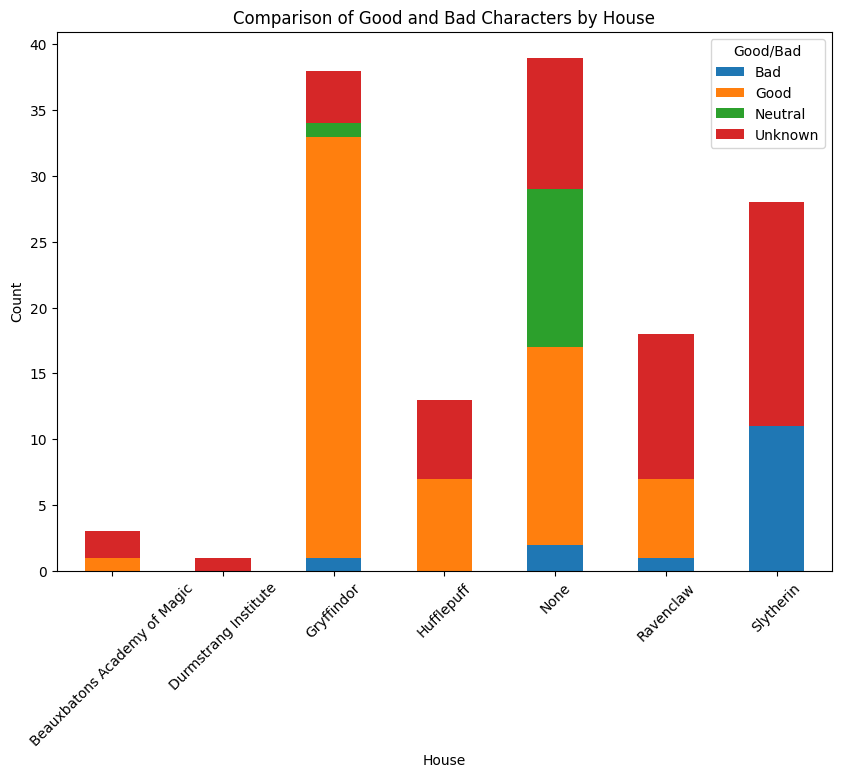

In [ ]:
import matplotlib.pyplot as plt

# Group the data by House and Good/Bad and count the occurrences
house_good_bad_counts = result_df.groupby(['House', 'Good/Bad']).size().unstack(fill_value=0)

# Plotting
house_good_bad_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Comparison of Good and Bad Characters by House')
plt.xlabel('House')
plt.ylabel('Count')
plt.legend(title='Good/Bad')
plt.xticks(rotation=45)
plt.show()

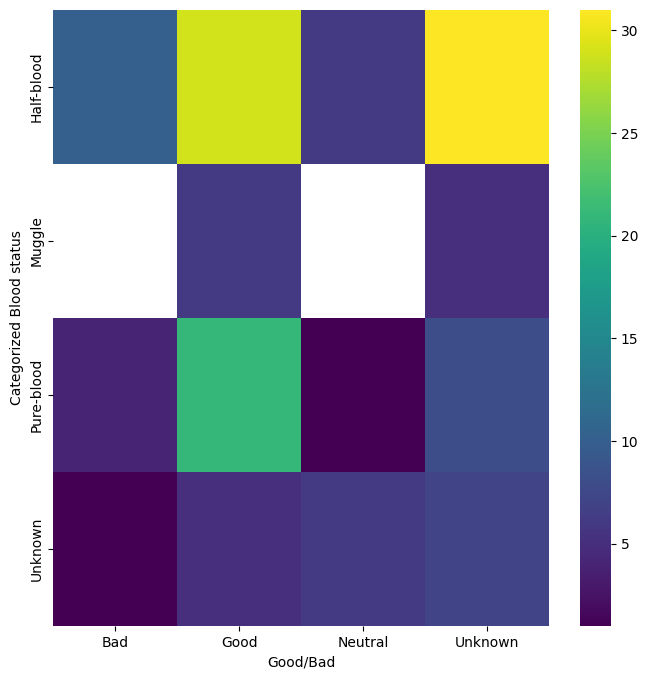

In [ ]:
# @title Good/Bad vs Categorized Blood status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Categorized Blood status'].value_counts()
    for x_label, grp in result_df.groupby('Good/Bad')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Good/Bad')
_ = plt.ylabel('Categorized Blood status')

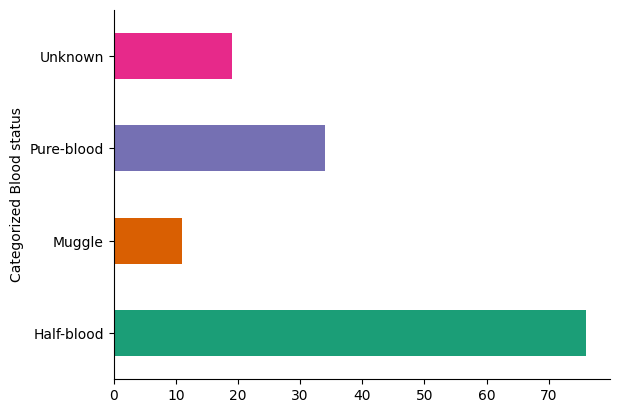

In [ ]:
# @title Categorized Blood status

from matplotlib import pyplot as plt
import seaborn as sns
result_df.groupby('Categorized Blood status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

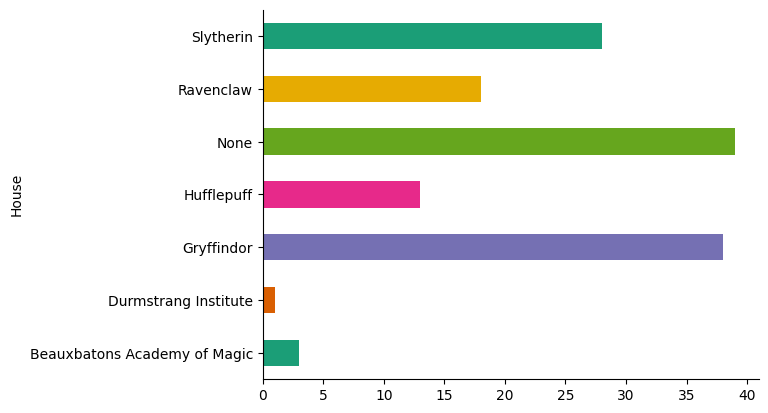

In [ ]:
# @title House

from matplotlib import pyplot as plt
import seaborn as sns
result_df.groupby('House').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

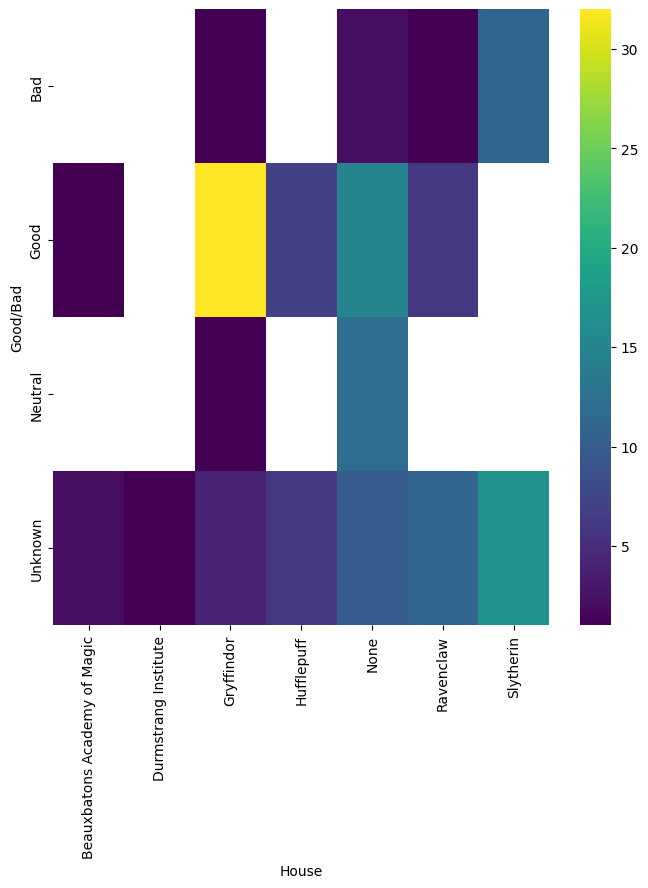

In [ ]:
# @title House vs Good/Bad

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Good/Bad'].value_counts()
    for x_label, grp in good_bad.groupby('House')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('House')
_ = plt.ylabel('Good/Bad')

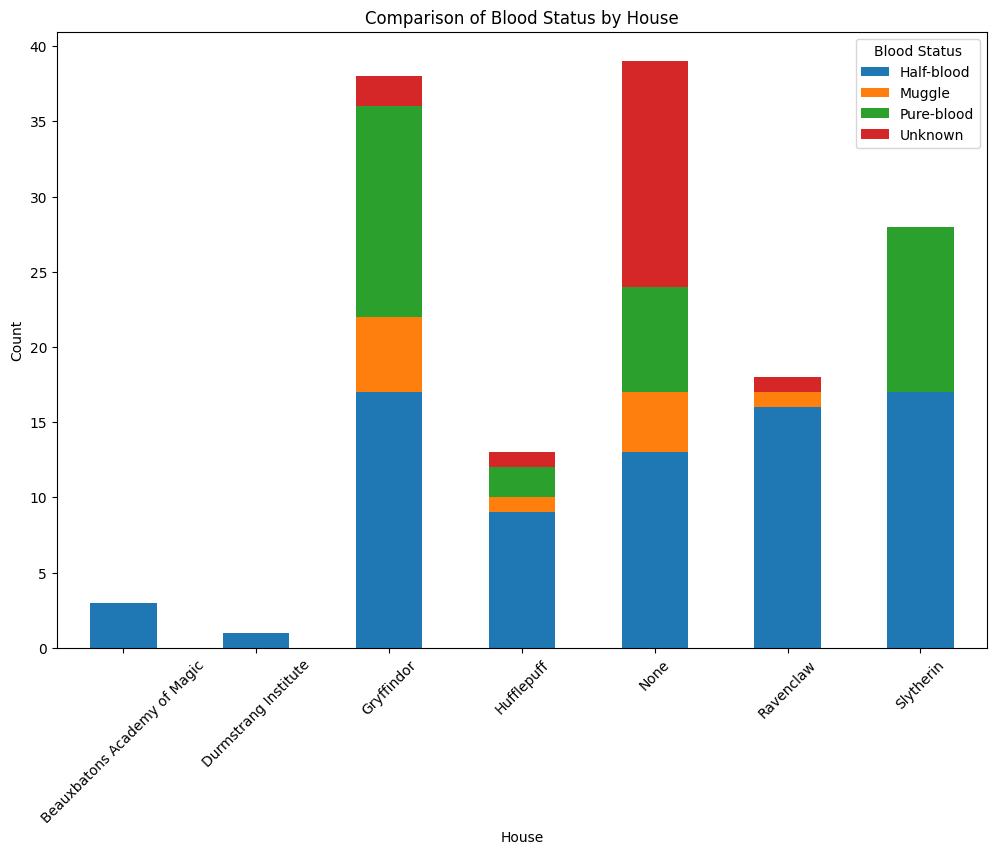

In [ ]:
# Group the data by House and Blood status and count the occurrences
house_blood_status_counts = result_df.groupby(['House', 'Categorized Blood status']).size().unstack(fill_value=0)

# Plotting
house_blood_status_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparison of Blood Status by House')
plt.xlabel('House')
plt.ylabel('Count')
plt.legend(title='Blood Status')
plt.xticks(rotation=45)
plt.show()

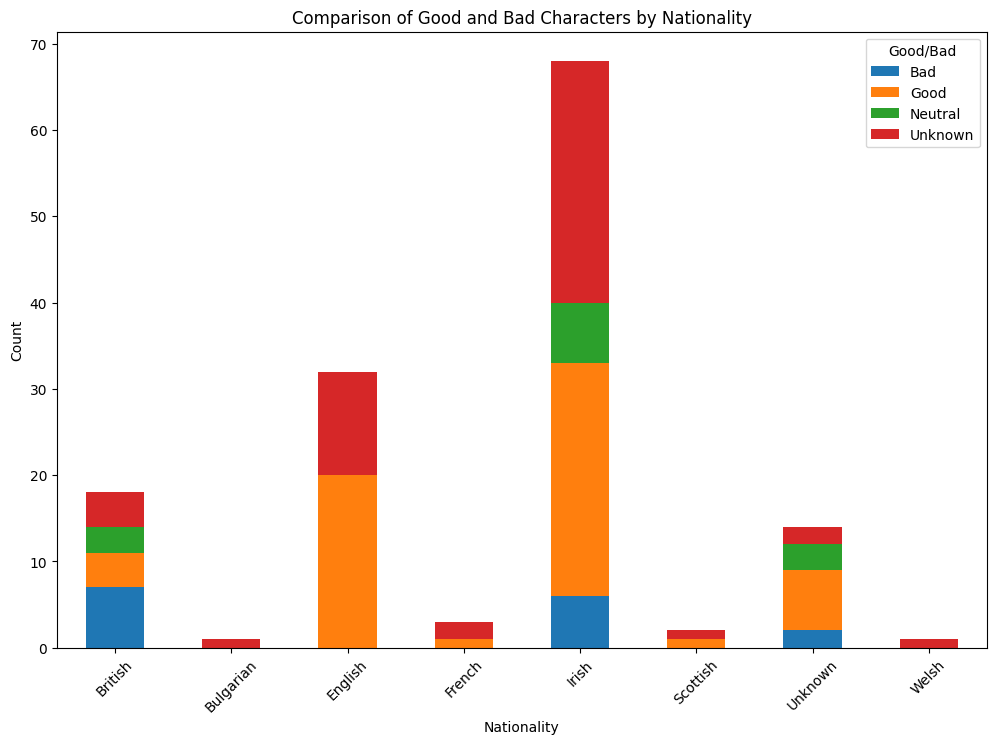

In [ ]:
# Group the data by Nationality and Good/Bad and count the occurrences
nationality_good_bad_counts = result_df.groupby(['Simplified Nationality', 'Good/Bad']).size().unstack(fill_value=0)

# Plotting
nationality_good_bad_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparison of Good and Bad Characters by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Good/Bad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Renaming column names so that they match
HarryPotter_3.rename(columns={'CHARACTER': 'Character', 'SENTENCE': 'Sentence'}, inplace=True)

In [ ]:
# Combining all the datasets
combined_df = pd.concat([HarryPotter_1, HarryPotter_2, HarryPotter_3], ignore_index=True)

In [ ]:
# Standardize capitalization of values in the 'CHARACTER' column
combined_df['Character'] = combined_df['Character'].str.capitalize()

In [ ]:
# Characters who said 'Voldemort' in the first 3 movies
combined_df['Character'] = combined_df['Character'].str.strip() # got rid of all the white spaces in the values
characters_who_said_voldemort = combined_df[combined_df['Sentence'].str.contains('Voldemort', case=False, na=False)]['Character']
characters_who_said_voldemort.unique()

array(['Hagrid', 'Harry', 'Hermione', 'Tom riddle', 'Dumbledore', 'Lupin',
       'Sirius'], dtype=object)

In [ ]:
# Counting how many times they said it
voldemort_mentions = combined_df[combined_df['Sentence'].str.contains('Voldemort', case=False, na=False)]
voldemort_mentions.groupby('Character').size()

Character
Dumbledore     5
Hagrid         2
Harry         13
Hermione       1
Lupin          2
Sirius         1
Tom riddle     4
dtype: int64